In [1]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from tqdm import tqdm
from wordcloud import WordCloud
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import twint
import nest_asyncio

nest_asyncio.apply()

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raizel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Raizel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Raizel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

VADER is a simple model used to perform sentiment analysis. 

In [3]:
vader = SentimentIntensityAnalyzer()

# Inception

In [4]:
#df_1 is a CSV of tweets (created in another notebook) about the movie Inception
Inception = pd.read_csv('work/df_1.csv')
Inception.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,30776953027956739,30776953027956739,1.296173e+12,2011-01-27 18:59:32,-500,NaN,Watching inception. Joseph gordon-levitt. Oh y...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1,30776922921246720,30776922921246720,1.296173e+12,2011-01-27 18:59:24,-500,NaN,Ken Watanabe &lt;---Reason to see Inception mo...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2,30776462000791552,30776462000791552,1.296173e+12,2011-01-27 18:57:34,-500,NaN,#NW Inception! yh yh yh.. stale girl.. waheva....,en,['nw'],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,3,30776412738682880,30776412738682880,1.296173e+12,2011-01-27 18:57:23,-500,NaN,"'Black Swan', 'The Social Network', 'Inception...",en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,4,30776381751173121,30776381751173121,1.296173e+12,2011-01-27 18:57:15,-500,NaN,I just voted for Inception for #BestScreenplay...,en,['bestscreenplay'],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [5]:
#check columns 
Inception.columns

Index(['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'date', 'timezone',
       'place', 'tweet', 'language', 'hashtags', 'cashtags', 'user_id',
       'user_id_str', 'username', 'name', 'day', 'hour', 'link', 'urls',
       'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [5]:
#drop unnecessary columns
Inception.drop(columns=['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'timezone',
       'place', 'cashtags', 'user_id', 'user_id_str', 'name',
       'day', 'hour', 'urls', 'photos', 'video', 'thumbnail', 'quote_url', 
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 
       'reply_to', 'translate', 'trans_src', 'trans_dest'], axis=1, inplace = True)

In [6]:
Inception.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date
0,2011-01-27 18:59:32,Watching inception. Joseph gordon-levitt. Oh y...,en,[],EmilyNMurray,https://twitter.com/EmilyNMurray/status/307769...,False,0,0,0,NaN
1,2011-01-27 18:59:24,Ken Watanabe &lt;---Reason to see Inception mo...,en,[],LisaAsanuma,https://twitter.com/LisaAsanuma/status/3077692...,False,0,0,1,NaN
2,2011-01-27 18:57:34,#NW Inception! yh yh yh.. stale girl.. waheva....,en,['nw'],MsAllurer,https://twitter.com/MsAllurer/status/307764620...,False,0,0,0,NaN
3,2011-01-27 18:57:23,"'Black Swan', 'The Social Network', 'Inception...",en,[],AlexaChill,https://twitter.com/AlexaChill/status/30776412...,False,0,0,0,NaN
4,2011-01-27 18:57:15,I just voted for Inception for #BestScreenplay...,en,['bestscreenplay'],MarioCayetano,https://twitter.com/MarioCayetano/status/30776...,False,0,0,0,NaN


In [7]:
#adjust date column
Inception['date'] = pd.to_datetime(Inception['date'])
Inception.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date
0,2011-01-27 18:59:32,Watching inception. Joseph gordon-levitt. Oh y...,en,[],EmilyNMurray,https://twitter.com/EmilyNMurray/status/307769...,False,0,0,0,NaN
1,2011-01-27 18:59:24,Ken Watanabe &lt;---Reason to see Inception mo...,en,[],LisaAsanuma,https://twitter.com/LisaAsanuma/status/3077692...,False,0,0,1,NaN
2,2011-01-27 18:57:34,#NW Inception! yh yh yh.. stale girl.. waheva....,en,['nw'],MsAllurer,https://twitter.com/MsAllurer/status/307764620...,False,0,0,0,NaN
3,2011-01-27 18:57:23,"'Black Swan', 'The Social Network', 'Inception...",en,[],AlexaChill,https://twitter.com/AlexaChill/status/30776412...,False,0,0,0,NaN
4,2011-01-27 18:57:15,I just voted for Inception for #BestScreenplay...,en,['bestscreenplay'],MarioCayetano,https://twitter.com/MarioCayetano/status/30776...,False,0,0,0,NaN


In [9]:
#calculate vader score for each tweet - a dictionary is created containing the negative neutral and positive score
Inception['vader_score'] = Inception['tweet'].apply(lambda x: vader.polarity_scores(x))
Inception['vader_score']

0       {'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compou...
1       {'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...
2       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3       {'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'comp...
4       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                              ...                        
5317    {'neg': 0.174, 'neu': 0.457, 'pos': 0.369, 'co...
5318    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5319    {'neg': 0.195, 'neu': 0.565, 'pos': 0.24, 'com...
5320    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5321    {'neg': 0.216, 'neu': 0.455, 'pos': 0.33, 'com...
Name: vader_score, Length: 5322, dtype: object

In [8]:
#the compound vader score
Inception['vader_score'] = Inception['tweet'].apply(lambda x: vader.polarity_scores(x)['compound'])
Inception['vader_score'].head()

0    0.6369
1    0.4019
2    0.0000
3    0.7579
4    0.0000
Name: vader_score, dtype: float64

In [9]:
#add vader scores into the Inception dataframe
Inception['positive sentiment score'] = Inception['tweet'].apply(lambda x: vader.polarity_scores(x)['pos'])
Inception['negative sentiment score'] = Inception['tweet'].apply(lambda x: vader.polarity_scores(x)['neg'])
Inception['neutral sentiment score'] = Inception['tweet'].apply(lambda x: vader.polarity_scores(x)['neu'])
Inception['compound sentiment score'] = Inception['tweet'].apply(lambda x: vader.polarity_scores(x)['compound'])
Inception.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2011-01-27 18:59:32,Watching inception. Joseph gordon-levitt. Oh y...,en,[],EmilyNMurray,https://twitter.com/EmilyNMurray/status/307769...,False,0,0,0,NaN,0.6369,0.510,0.0,0.490,0.6369
1,2011-01-27 18:59:24,Ken Watanabe &lt;---Reason to see Inception mo...,en,[],LisaAsanuma,https://twitter.com/LisaAsanuma/status/3077692...,False,0,0,1,NaN,0.4019,0.184,0.0,0.816,0.4019
2,2011-01-27 18:57:34,#NW Inception! yh yh yh.. stale girl.. waheva....,en,['nw'],MsAllurer,https://twitter.com/MsAllurer/status/307764620...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000
3,2011-01-27 18:57:23,"'Black Swan', 'The Social Network', 'Inception...",en,[],AlexaChill,https://twitter.com/AlexaChill/status/30776412...,False,0,0,0,NaN,0.7579,0.317,0.0,0.683,0.7579
4,2011-01-27 18:57:15,I just voted for Inception for #BestScreenplay...,en,['bestscreenplay'],MarioCayetano,https://twitter.com/MarioCayetano/status/30776...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


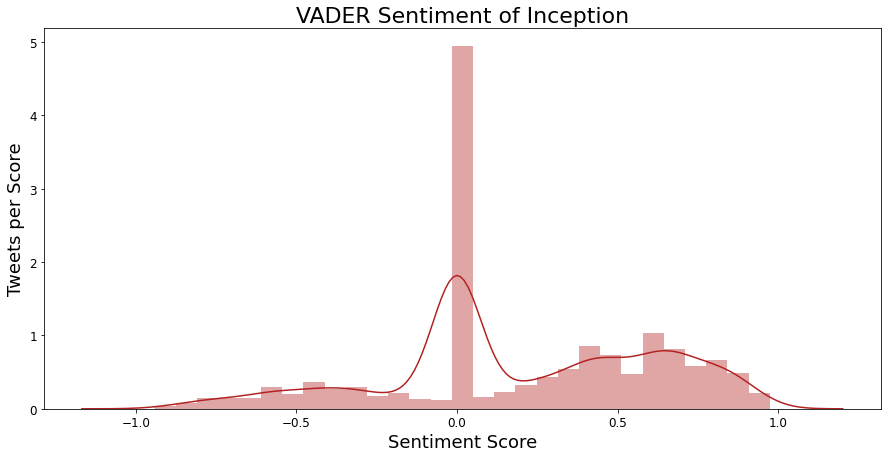

In [10]:
#distribution of vader score
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.distplot(Inception['vader_score'], color = 'firebrick')
plt.xlabel('Sentiment Score', fontsize=18)
plt.ylabel('Tweets per Score', fontsize=18)
plt.title('VADER Sentiment of Inception', fontsize=22)
plt.tick_params(labelsize='large')

plt.savefig('images/VADERinception.jpg')

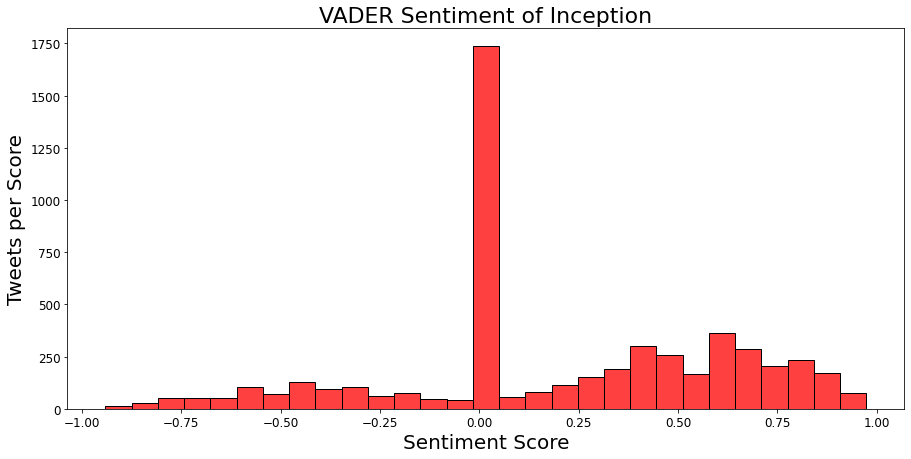

In [12]:
#vader score histogram
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.histplot(data = Inception, x='vader_score', color = 'red')
plt.xlabel('Sentiment Score', fontsize=20)
plt.ylabel('Tweets per Score', fontsize=20)
plt.title('VADER Sentiment of Inception', fontsize=22)
plt.tick_params(labelsize='large')

Overall the score was mostly positive. 

# Ingrid Goes West

In [14]:
#df_2 is a CSV of tweets (created in another notebook) about the movie Ingrid Goes West
IngridGoesWest = pd.read_csv('df_2.csv')

In [15]:
#drop unnecessary columns
IngridGoesWest.drop(columns=['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'timezone',
       'place', 'cashtags', 'user_id', 'user_id_str', 'name',
       'day', 'hour', 'urls', 'photos', 'video', 'thumbnail', 'quote_url', 
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 
       'reply_to', 'translate', 'trans_src', 'trans_dest'], axis=1, inplace = True)

In [16]:
IngridGoesWest.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date
0,2018-08-23 18:50:34,Another day another avocado toast. #avocadotoa...,en,"['avocadotoast', 'ingridgoeswest', '31days31ph...",ShepherdGirl,https://twitter.com/ShepherdGirl/status/103276...,False,0,0,0,NaN
1,2018-08-23 17:32:00,#IngridGoesWest is a total package when you wa...,en,['ingridgoeswest'],BisiAdediran,https://twitter.com/BisiAdediran/status/103274...,False,0,0,0,NaN
2,2018-08-23 13:00:47,44. Step 45. The dark tower 46. Ingrid goes we...,en,[],wawalily247,https://twitter.com/wawalily247/status/1032674...,False,0,0,0,NaN
3,2018-08-23 04:13:02,INGRID GOES WEST [Official Teaser] - August 20...,en,[],ScreenTweet,https://twitter.com/ScreenTweet/status/1032541...,False,0,0,0,NaN
4,2018-08-23 02:50:58,two movies own my whole heart and that is the ...,en,[],didntifade,https://twitter.com/didntifade/status/10325205...,False,1,0,0,NaN


In [17]:
IngridGoesWest['date'] = pd.to_datetime(IngridGoesWest['date'])
IngridGoesWest.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date
0,2018-08-23 18:50:34,Another day another avocado toast. #avocadotoa...,en,"['avocadotoast', 'ingridgoeswest', '31days31ph...",ShepherdGirl,https://twitter.com/ShepherdGirl/status/103276...,False,0,0,0,NaN
1,2018-08-23 17:32:00,#IngridGoesWest is a total package when you wa...,en,['ingridgoeswest'],BisiAdediran,https://twitter.com/BisiAdediran/status/103274...,False,0,0,0,NaN
2,2018-08-23 13:00:47,44. Step 45. The dark tower 46. Ingrid goes we...,en,[],wawalily247,https://twitter.com/wawalily247/status/1032674...,False,0,0,0,NaN
3,2018-08-23 04:13:02,INGRID GOES WEST [Official Teaser] - August 20...,en,[],ScreenTweet,https://twitter.com/ScreenTweet/status/1032541...,False,0,0,0,NaN
4,2018-08-23 02:50:58,two movies own my whole heart and that is the ...,en,[],didntifade,https://twitter.com/didntifade/status/10325205...,False,1,0,0,NaN


In [64]:
IngridGoesWest['vader_score'] = IngridGoesWest['tweet'].apply(lambda x: vader.polarity_scores(x))
IngridGoesWest['vader_score']

0       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1       {'neg': 0.062, 'neu': 0.827, 'pos': 0.111, 'co...
2       {'neg': 0.0, 'neu': 0.917, 'pos': 0.083, 'comp...
3       {'neg': 0.182, 'neu': 0.818, 'pos': 0.0, 'comp...
4       {'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'comp...
                              ...                        
5153    {'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'comp...
5154    {'neg': 0.0, 'neu': 0.716, 'pos': 0.284, 'comp...
5155    {'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...
5156    {'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'comp...
5157    {'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'comp...
Name: vader_score, Length: 5158, dtype: object

In [65]:
IngridGoesWest['vader_score'] = IngridGoesWest['tweet'].apply(lambda x: vader.polarity_scores(x)['compound'])
IngridGoesWest['vader_score'].head()

0    0.0000
1    0.3400
2    0.4404
3   -0.2500
4    0.6369
Name: vader_score, dtype: float64

In [66]:
IngridGoesWest['positive sentiment score'] = IngridGoesWest['tweet'].apply(lambda x: vader.polarity_scores(x)['pos'])
IngridGoesWest['negative sentiment score'] = IngridGoesWest['tweet'].apply(lambda x: vader.polarity_scores(x)['neg'])
IngridGoesWest['neutral sentiment score'] = IngridGoesWest['tweet'].apply(lambda x: vader.polarity_scores(x)['neu'])
IngridGoesWest['compound sentiment score'] = IngridGoesWest['tweet'].apply(lambda x: vader.polarity_scores(x)['compound'])
IngridGoesWest.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2018-08-23 18:50:34,Another day another avocado toast. #avocadotoa...,en,"['avocadotoast', 'ingridgoeswest', '31days31ph...",ShepherdGirl,https://twitter.com/ShepherdGirl/status/103276...,False,0,0,0,NaN,0.0000,0.000,0.000,1.000,0.0000
1,2018-08-23 17:32:00,#IngridGoesWest is a total package when you wa...,en,['ingridgoeswest'],BisiAdediran,https://twitter.com/BisiAdediran/status/103274...,False,0,0,0,NaN,0.3400,0.111,0.062,0.827,0.3400
2,2018-08-23 13:00:47,44. Step 45. The dark tower 46. Ingrid goes we...,en,[],wawalily247,https://twitter.com/wawalily247/status/1032674...,False,0,0,0,NaN,0.4404,0.083,0.000,0.917,0.4404
3,2018-08-23 04:13:02,INGRID GOES WEST [Official Teaser] - August 20...,en,[],ScreenTweet,https://twitter.com/ScreenTweet/status/1032541...,False,0,0,0,NaN,-0.2500,0.000,0.182,0.818,-0.2500
4,2018-08-23 02:50:58,two movies own my whole heart and that is the ...,en,[],didntifade,https://twitter.com/didntifade/status/10325205...,False,1,0,0,NaN,0.6369,0.208,0.000,0.792,0.6369


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


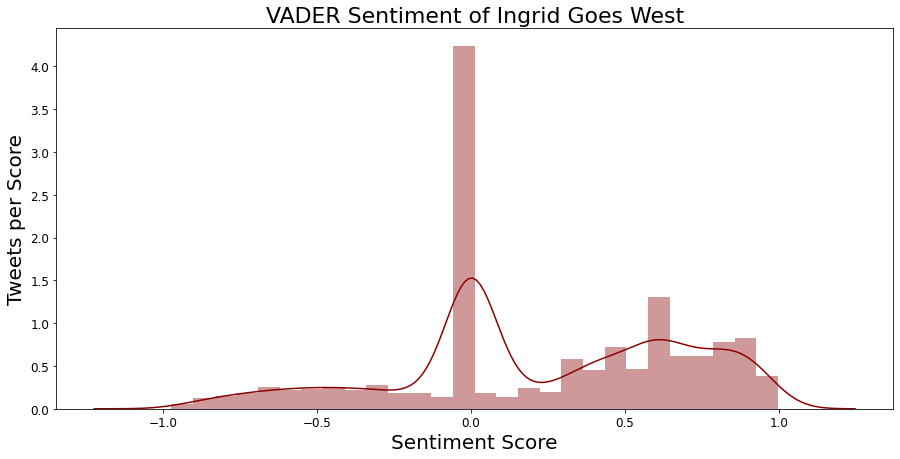

In [73]:
#distribution of vader score
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.distplot(IngridGoesWest['vader_score'], color = 'darkred')
plt.xlabel('Sentiment Score', fontsize=18)
plt.ylabel('Tweets per Score', fontsize=18)
plt.title('VADER Sentiment of Ingrid Goes West', fontsize=22)
plt.tick_params(labelsize='large')

plt.savefig('images/VADERingrid.jpg')

# The Big Sick

In [5]:
#df_3 is a CSV of tweets (created in another notebook) concerining the movie The Big Sick
BigSick = pd.read_csv('df_3.csv')

In [6]:
#drop unnecessary columns
BigSick.drop(columns=['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'timezone',
       'place', 'cashtags', 'user_id', 'user_id_str', 'name',
       'day', 'hour', 'urls', 'photos', 'video', 'thumbnail', 'quote_url', 'retweet_date',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 
       'reply_to', 'translate', 'trans_src', 'trans_dest'], axis=1, inplace = True)

In [8]:
BigSick['date'] = pd.to_datetime(BigSick['date'])
BigSick.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets
0,2018-07-12 19:40:09,@kumailn I just saw the Big Sick and you are a...,en,[],lellomoke,https://twitter.com/lellomoke/status/101755423...,False,0,0,0
1,2018-07-12 19:25:45,@kumailn Just finished The Big Sick. It was s...,en,[],klingerock,https://twitter.com/klingerock/status/10175506...,False,0,0,0
2,2018-07-12 19:02:35,I added a video to a @YouTube playlist https:...,en,[],TheRedShamrock,https://twitter.com/TheRedShamrock/status/1017...,False,0,0,0
3,2018-07-12 17:22:11,@kumailn damn why did I just now watch the big...,en,[],hanneskaeufler,https://twitter.com/hanneskaeufler/status/1017...,False,1,1,0
4,2018-07-12 15:39:02,At the beginning of a relationship: “omg you’r...,en,[],EwdatsGROSS,https://twitter.com/EwdatsGROSS/status/1017493...,False,34,0,3


In [9]:
BigSick['vader_score'] = BigSick['tweet'].apply(lambda x: vader.polarity_scores(x))
BigSick['vader_score']

0       {'neg': 0.095, 'neu': 0.66, 'pos': 0.245, 'com...
1       {'neg': 0.195, 'neu': 0.531, 'pos': 0.274, 'co...
2       {'neg': 0.202, 'neu': 0.798, 'pos': 0.0, 'comp...
3       {'neg': 0.301, 'neu': 0.527, 'pos': 0.172, 'co...
4       {'neg': 0.176, 'neu': 0.642, 'pos': 0.182, 'co...
                              ...                        
4447    {'neg': 0.25, 'neu': 0.649, 'pos': 0.101, 'com...
4448    {'neg': 0.111, 'neu': 0.672, 'pos': 0.217, 'co...
4449    {'neg': 0.163, 'neu': 0.693, 'pos': 0.144, 'co...
4450    {'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'comp...
4451    {'neg': 0.162, 'neu': 0.838, 'pos': 0.0, 'comp...
Name: vader_score, Length: 4452, dtype: object

In [10]:
BigSick['vader_score'] = BigSick['tweet'].apply(lambda x: vader.polarity_scores(x)['compound'])
BigSick['vader_score'].head()

0    0.7384
1    0.3268
2   -0.5106
3   -0.4017
4    0.0785
Name: vader_score, dtype: float64

In [11]:
BigSick['positive sentiment score'] = BigSick['tweet'].apply(lambda x: vader.polarity_scores(x)['pos'])
BigSick['negative sentiment score'] = BigSick['tweet'].apply(lambda x: vader.polarity_scores(x)['neg'])
BigSick['neutral sentiment score'] = BigSick['tweet'].apply(lambda x: vader.polarity_scores(x)['neu'])
BigSick['compound sentiment score'] = BigSick['tweet'].apply(lambda x: vader.polarity_scores(x)['compound'])
BigSick.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2018-07-12 19:40:09,@kumailn I just saw the Big Sick and you are a...,en,[],lellomoke,https://twitter.com/lellomoke/status/101755423...,False,0,0,0,0.7384,0.245,0.095,0.660,0.7384
1,2018-07-12 19:25:45,@kumailn Just finished The Big Sick. It was s...,en,[],klingerock,https://twitter.com/klingerock/status/10175506...,False,0,0,0,0.3268,0.274,0.195,0.531,0.3268
2,2018-07-12 19:02:35,I added a video to a @YouTube playlist https:...,en,[],TheRedShamrock,https://twitter.com/TheRedShamrock/status/1017...,False,0,0,0,-0.5106,0.000,0.202,0.798,-0.5106
3,2018-07-12 17:22:11,@kumailn damn why did I just now watch the big...,en,[],hanneskaeufler,https://twitter.com/hanneskaeufler/status/1017...,False,1,1,0,-0.4017,0.172,0.301,0.527,-0.4017
4,2018-07-12 15:39:02,At the beginning of a relationship: “omg you’r...,en,[],EwdatsGROSS,https://twitter.com/EwdatsGROSS/status/1017493...,False,34,0,3,0.0785,0.182,0.176,0.642,0.0785


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


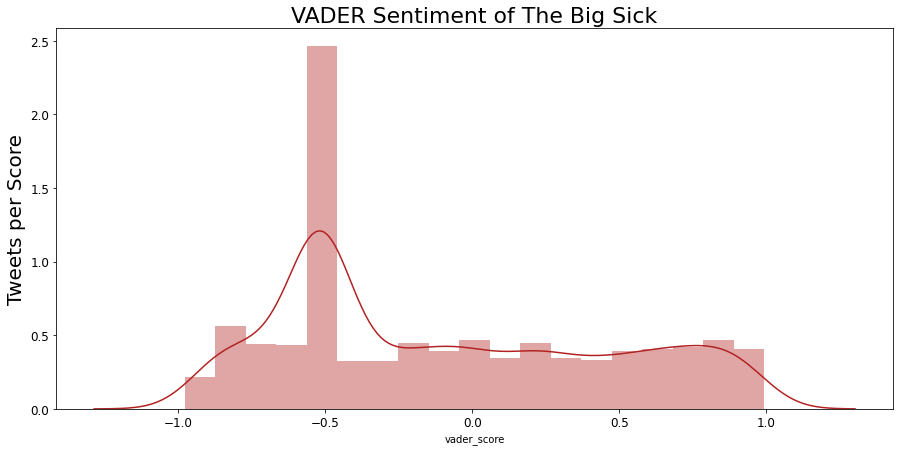

In [17]:
#distribution of vader score
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.distplot(BigSick['vader_score'], color = 'firebrick')
plt.xlabel('Compound Sentiment Score', fontsize=18)
plt.ylabel('Tweets per Score', fontsize=18)
plt.title('VADER Sentiment of The Big Sick', fontsize=22)
plt.tick_params(labelsize='large')

plt.savefig('images/VADERbigsick.jpg')

The Big Sick was good. The Vader Score must be off. Raizel, look into this. This is odd! You liked it therefore the whole world must too!

# Gone Girl

In [18]:
#df_4 is a CSV of tweets (created in another notebook) about the movie Gone Girl
GoneGirl = pd.read_csv('df_4.csv')

In [23]:
#drop unnecessary columns
GoneGirl.drop(columns=['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'timezone',
       'place', 'cashtags', 'user_id', 'user_id_str', 'name',
       'day', 'hour', 'urls', 'photos', 'video', 'thumbnail', 'quote_url', 'retweet_date',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 
       'reply_to', 'translate', 'trans_src', 'trans_dest'], axis=1, inplace = True)

In [24]:
#just incase I try a time series
GoneGirl['date'] = pd.to_datetime(GoneGirl['date'])

In [25]:
GoneGirl['vader_score'] = GoneGirl['tweet'].apply(lambda x: vader.polarity_scores(x))
GoneGirl['vader_score']

0       {'neg': 0.299, 'neu': 0.701, 'pos': 0.0, 'comp...
1       {'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...
2       {'neg': 0.407, 'neu': 0.593, 'pos': 0.0, 'comp...
3       {'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...
4       {'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...
                              ...                        
5215    {'neg': 0.236, 'neu': 0.659, 'pos': 0.105, 'co...
5216    {'neg': 0.408, 'neu': 0.592, 'pos': 0.0, 'comp...
5217    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5218    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5219    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: vader_score, Length: 5220, dtype: object

In [26]:
GoneGirl['positive sentiment score'] = GoneGirl['tweet'].apply(lambda x: vader.polarity_scores(x)['pos'])
GoneGirl['negative sentiment score'] = GoneGirl['tweet'].apply(lambda x: vader.polarity_scores(x)['neg'])
GoneGirl['neutral sentiment score'] = GoneGirl['tweet'].apply(lambda x: vader.polarity_scores(x)['neu'])
GoneGirl['compound sentiment score'] = GoneGirl['tweet'].apply(lambda x: vader.polarity_scores(x)['compound'])
GoneGirl.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2015-10-01 19:49:05,(#UntilDawn spoilers) HE GONE GIRL'D HIS PHALA...,en,['untildawn'],bradyonetta,https://twitter.com/bradyonetta/status/6497327...,False,1,1,0,"{'neg': 0.299, 'neu': 0.701, 'pos': 0.0, 'comp...",0.000,0.299,0.701,-0.5904
1,2015-10-01 19:48:58,@chlomeganda gone girl chloeeee :),en,[],ChanwooCheeks,https://twitter.com/ChanwooCheeks/status/64973...,False,0,1,0,"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...",0.429,0.000,0.571,0.4588
2,2015-10-01 19:48:09,"(#UntilDawn spoilers) OPEN THE BEAR TRAP, CRY....",en,['untildawn'],bradyonetta,https://twitter.com/bradyonetta/status/6497325...,False,0,1,0,"{'neg': 0.407, 'neu': 0.593, 'pos': 0.0, 'comp...",0.000,0.407,0.593,-0.7824
3,2015-10-01 19:46:52,Suspect indicted in Vallejo 'Gone Girl' kidnap...,en,[],OmarAzimi,https://twitter.com/OmarAzimi/status/649732240...,False,1,0,0,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",0.000,0.104,0.896,-0.2960
4,2015-10-01 19:45:48,Gone Girl is a fucking crazy movie #thumbsup,en,['thumbsup'],kempatsu,https://twitter.com/kempatsu/status/6497319736...,False,1,0,0,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...",0.000,0.278,0.722,-0.4005


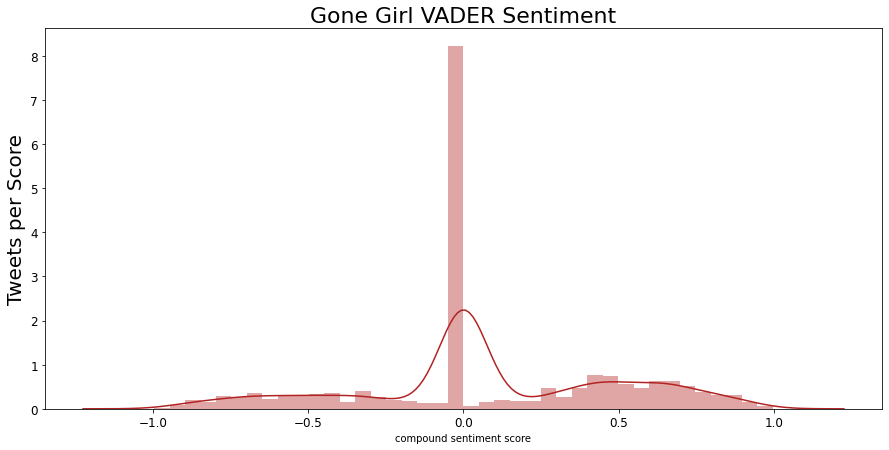

In [28]:
#distribution of vader score
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.distplot(GoneGirl['compound sentiment score'], color = 'firebrick')
plt.xlabel('Compound Sentiment Score', fontsize=18)
plt.ylabel('Tweets per Score', fontsize=18)
plt.title('Gone Girl VADER Sentiment', fontsize=22)
plt.tick_params(labelsize='large')

plt.savefig('images/VADERgonegirl.jpg')

# 17 Again

In [30]:
#df_5 is a CSV of tweets (created in another notebook) about the movie 17 Again (with Zac Efron!)
Again17 = pd.read_csv('df_5.csv')

In [31]:
#drop unnecessary columns 
Again17.drop(columns=['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'timezone',
       'place', 'cashtags', 'user_id', 'user_id_str', 'name',
       'day', 'hour', 'urls', 'photos', 'video', 'thumbnail', 'quote_url', 'retweet_date',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 
       'reply_to', 'translate', 'trans_src', 'trans_dest'], axis=1, inplace = True)

In [32]:
#just incase I try a time series
Again17['date'] = pd.to_datetime(Again17['date'])

In [33]:
#finding Vader score of each tweet
Again17['vader_score'] = Again17['tweet'].apply(lambda x: vader.polarity_scores(x))
Again17['vader_score']

0       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1       {'neg': 0.196, 'neu': 0.536, 'pos': 0.268, 'co...
2       {'neg': 0.076, 'neu': 0.675, 'pos': 0.249, 'co...
3       {'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp...
4       {'neg': 0.082, 'neu': 0.709, 'pos': 0.21, 'com...
                              ...                        
5167    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5168    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5169    {'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'comp...
5170    {'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'comp...
5171    {'neg': 0.251, 'neu': 0.749, 'pos': 0.0, 'comp...
Name: vader_score, Length: 5172, dtype: object

In [35]:
Again17['positive sentiment score'] = Again17['tweet'].apply(lambda x: vader.polarity_scores(x)['pos'])
Again17['negative sentiment score'] = Again17['tweet'].apply(lambda x: vader.polarity_scores(x)['neg'])
Again17['neutral sentiment score'] = Again17['tweet'].apply(lambda x: vader.polarity_scores(x)['neu'])
Again17['compound sentiment score'] = Again17['tweet'].apply(lambda x: vader.polarity_scores(x)['compound'])
Again17.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2010-04-12 19:44:15,http://bit.ly/bqye6j where can i get a dress ...,en,[],MarleneJenkins,https://twitter.com/MarleneJenkins/status/1207...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
1,2010-04-12 19:28:20,watching 17 Again. :) i missed this movie.,en,[],EuniceHilario,https://twitter.com/EuniceHilario/status/12072...,False,0,0,0,"{'neg': 0.196, 'neu': 0.536, 'pos': 0.268, 'co...",0.268,0.196,0.536,0.2023
2,2010-04-12 19:27:47,"@conallen haha not surprising. ""17 Again"" seem...",en,[],sunnyjac0b,https://twitter.com/sunnyjac0b/status/12072044784,False,0,0,0,"{'neg': 0.076, 'neu': 0.675, 'pos': 0.249, 'co...",0.249,0.076,0.675,0.6232
3,2010-04-12 19:25:32,"@tjlyricz just gonna watch 17 again, and you g...",en,[],desireefurlong,https://twitter.com/desireefurlong/status/1207...,False,0,0,0,"{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp...",0.136,0.000,0.864,0.4588
4,2010-04-12 19:21:54,@jacobjunior7 yeah more boyish then which is w...,en,[],conallen,https://twitter.com/conallen/status/12071772509,False,0,0,0,"{'neg': 0.082, 'neu': 0.709, 'pos': 0.21, 'com...",0.210,0.082,0.709,0.4552


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


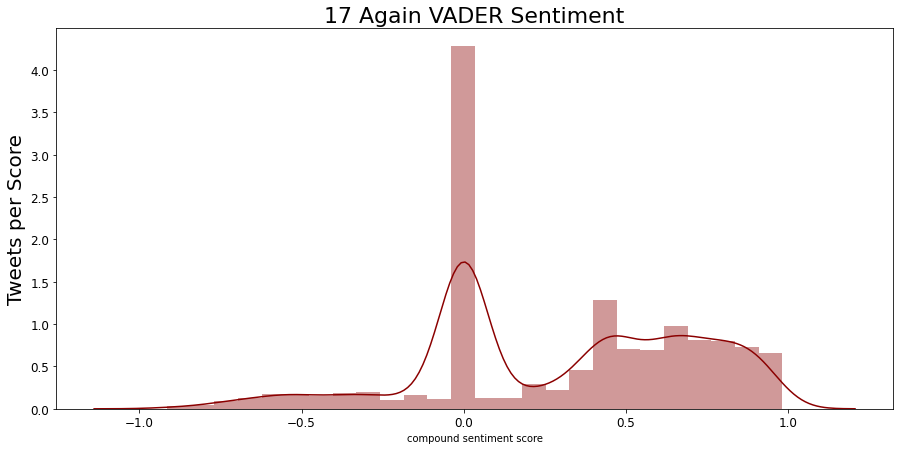

In [44]:
#distribution of vader score
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.distplot(Again17['compound sentiment score'], color = 'darkred')
plt.xlabel('Compound Sentiment Score', fontsize=18)
plt.ylabel('Tweets per Score', fontsize=18)
plt.title('17 Again VADER Sentiment', fontsize=22)
plt.tick_params(labelsize='large')

plt.savefig('images/VADER17again.jpg')

# Jennifer's Body

In [45]:
#df_6 is a CSV of tweets (created in another notebook) about the movie Jennifer's Body
JennifersBody = pd.read_csv('df_6.csv')

In [46]:
#drop unnecessary columns
JennifersBody.drop(columns=['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'timezone',
       'place', 'cashtags', 'user_id', 'user_id_str', 'name',
       'day', 'hour', 'urls', 'photos', 'video', 'thumbnail', 'quote_url', 'retweet_date',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 
       'reply_to', 'translate', 'trans_src', 'trans_dest'], axis=1, inplace = True)

In [48]:
#just incase I try a time series
JennifersBody['date'] = pd.to_datetime(JennifersBody['date'])

In [49]:
JennifersBody['vader_score'] = JennifersBody['tweet'].apply(lambda x: vader.polarity_scores(x))
JennifersBody['vader_score']

0       {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...
1       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2       {'neg': 0.29, 'neu': 0.532, 'pos': 0.178, 'com...
3       {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...
4       {'neg': 0.258, 'neu': 0.742, 'pos': 0.0, 'comp...
                              ...                        
5196    {'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'comp...
5197    {'neg': 0.212, 'neu': 0.788, 'pos': 0.0, 'comp...
5198    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5199    {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...
5200    {'neg': 0.0, 'neu': 0.646, 'pos': 0.354, 'comp...
Name: vader_score, Length: 5201, dtype: object

In [51]:
JennifersBody['positive sentiment score'] = JennifersBody['tweet'].apply(lambda x: vader.polarity_scores(x)['pos'])
JennifersBody['negative sentiment score'] = JennifersBody['tweet'].apply(lambda x: vader.polarity_scores(x)['neg'])
JennifersBody['neutral sentiment score'] = JennifersBody['tweet'].apply(lambda x: vader.polarity_scores(x)['neu'])
JennifersBody['compound sentiment score'] = JennifersBody['tweet'].apply(lambda x: vader.polarity_scores(x)['compound'])
JennifersBody.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2010-09-16 19:57:28,I'll wear my Jennifer's Body shirt and red and...,en,[],gogoalexranger,https://twitter.com/gogoalexranger/status/2470...,False,0,0,0,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...",0.189,0.000,0.811,0.5411
1,2010-09-16 18:40:07,"Watching Jennifer's Body with Erin & Jess, the...",en,[],dull_life,https://twitter.com/dull_life/status/24703649087,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
2,2010-09-16 17:22:37,Ok I just threw up some black ropey stuff like...,en,[],advocatediaboli,https://twitter.com/advocatediaboli/status/246...,False,0,0,0,"{'neg': 0.29, 'neu': 0.532, 'pos': 0.178, 'com...",0.178,0.290,0.532,-0.6037
3,2010-09-16 16:59:37,The Jennifer's Body soundtrack is so good. If ...,en,[],TheKatValentine,https://twitter.com/TheKatValentine/status/246...,False,0,0,0,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.223,0.000,0.777,0.5777
4,2010-09-16 16:05:32,'Jennifer's body' is possibly one of the worst...,en,[],_BeckyHart,https://twitter.com/_BeckyHart/status/24693353486,False,0,0,0,"{'neg': 0.258, 'neu': 0.742, 'pos': 0.0, 'comp...",0.000,0.258,0.742,-0.8070


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


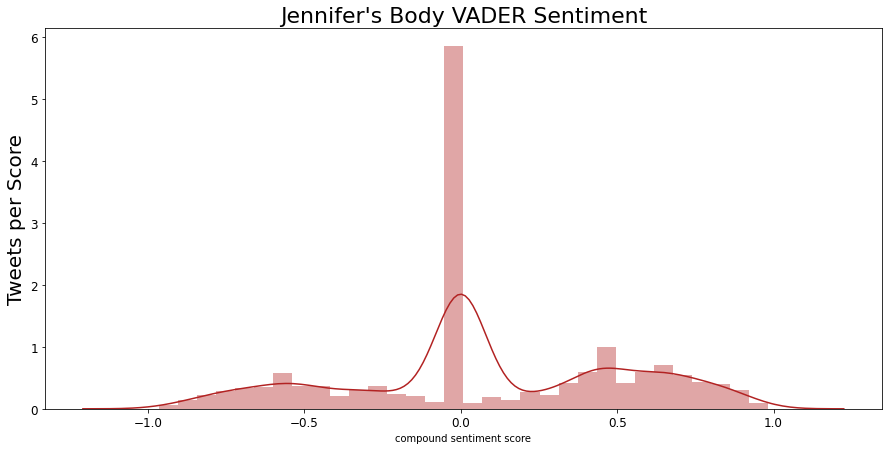

In [52]:
#distribution of vader score
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.distplot(JennifersBody['compound sentiment score'], color = 'firebrick')
plt.xlabel('Compound Sentiment Score', fontsize=18)
plt.ylabel('Tweets per Score', fontsize=18)
plt.title("Jennifer's Body VADER Sentiment", fontsize=22)
plt.tick_params(labelsize='large')

plt.savefig('images/VADERjennifersbody.jpg')

# The Shape of Water

In [53]:
#df_7 is a CSV of tweets (created in another notebook) about the movie The Shape of Water
ShapeOfWater = pd.read_csv('df_7.csv')

In [54]:
#drop unnecessary columns
ShapeOfWater.drop(columns=['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'timezone',
       'place', 'cashtags', 'user_id', 'user_id_str', 'name',
       'day', 'hour', 'urls', 'photos', 'video', 'thumbnail', 'quote_url', 'retweet_date',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 
       'reply_to', 'translate', 'trans_src', 'trans_dest'], axis=1, inplace = True)

In [55]:
#fix date
ShapeOfWater['date'] = pd.to_datetime(ShapeOfWater['date'])

In [56]:
ShapeOfWater['vader_score'] = ShapeOfWater['tweet'].apply(lambda x: vader.polarity_scores(x))
ShapeOfWater['vader_score']

0       {'neg': 0.115, 'neu': 0.697, 'pos': 0.188, 'co...
1       {'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...
2       {'neg': 0.241, 'neu': 0.586, 'pos': 0.173, 'co...
3       {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...
4       {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...
                              ...                        
5214    {'neg': 0.12, 'neu': 0.71, 'pos': 0.17, 'compo...
5215    {'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'comp...
5216    {'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compou...
5217    {'neg': 0.101, 'neu': 0.782, 'pos': 0.117, 'co...
5218    {'neg': 0.05, 'neu': 0.783, 'pos': 0.167, 'com...
Name: vader_score, Length: 5219, dtype: object

In [57]:
ShapeOfWater['positive sentiment score'] = ShapeOfWater['tweet'].apply(lambda x: vader.polarity_scores(x)['pos'])
ShapeOfWater['negative sentiment score'] = ShapeOfWater['tweet'].apply(lambda x: vader.polarity_scores(x)['neg'])
ShapeOfWater['neutral sentiment score'] = ShapeOfWater['tweet'].apply(lambda x: vader.polarity_scores(x)['neu'])
ShapeOfWater['compound sentiment score'] = ShapeOfWater['tweet'].apply(lambda x: vader.polarity_scores(x)['compound'])
ShapeOfWater.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2018-08-29 19:59:28,Fab and I watching shape of water together and...,en,[],kjimuseum,https://twitter.com/kjimuseum/status/103495371...,False,1,0,0,"{'neg': 0.115, 'neu': 0.697, 'pos': 0.188, 'co...",0.188,0.115,0.697,0.2732
1,2018-08-29 19:43:01,📷 hellohousemouse: the shape of water model: ...,en,[],annestaggwrites,https://twitter.com/annestaggwrites/status/103...,False,0,0,0,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...",0.218,0.000,0.782,0.5994
2,2018-08-29 19:39:36,"""The Shape of Water is like alien Amelie, but ...",en,[],TheGreenGreek,https://twitter.com/TheGreenGreek/status/10349...,False,2,0,0,"{'neg': 0.241, 'neu': 0.586, 'pos': 0.173, 'co...",0.173,0.241,0.586,-0.4953
3,2018-08-29 19:38:41,@CharlieWSwain That couple in “The Shape Of Wa...,en,[],cliffmarshall,https://twitter.com/cliffmarshall/status/10349...,False,1,0,0,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...",0.091,0.000,0.909,0.2960
4,2018-08-29 19:37:09,"More power to him. Sure beats the spew, prais...",en,[],biomom64,https://twitter.com/biomom64/status/1034948099...,False,0,0,0,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.188,0.000,0.812,0.7003


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


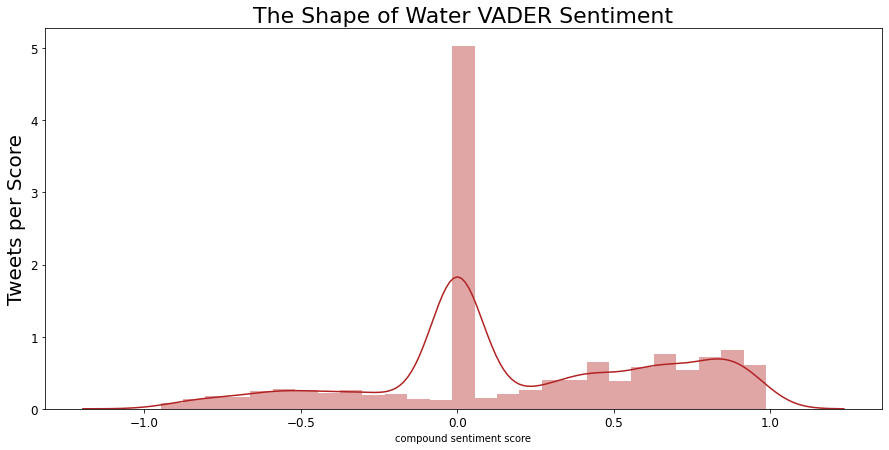

In [58]:
#distribution of vader score
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.distplot(ShapeOfWater['compound sentiment score'], color = 'firebrick')
plt.xlabel('Compound Sentiment Score', fontsize=18)
plt.ylabel('Tweets per Score', fontsize=18)
plt.title("The Shape of Water VADER Sentiment", fontsize=22)
plt.tick_params(labelsize='large')

plt.savefig('images/VADERtheshapeofwater.jpg')

I don't remember people liking this movie

# The Big Short

In [59]:
#read in CSV of The Big Short Tweets from another notebook
BigShort = pd.read_csv('df_8.csv')

In [60]:
#drop unnecessary columns
BigShort.drop(columns=['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'timezone',
       'place', 'cashtags', 'user_id', 'user_id_str', 'name',
       'day', 'hour', 'urls', 'photos', 'video', 'thumbnail', 'quote_url', 'retweet_date',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 
       'reply_to', 'translate', 'trans_src', 'trans_dest'], axis=1, inplace = True)

In [61]:
#date tp o datetime
BigShort['date'] = pd.to_datetime(BigShort['date'])

In [62]:
BigShort['vader_score'] = BigShort['tweet'].apply(lambda x: vader.polarity_scores(x))
BigShort['vader_score']

0       {'neg': 0.113, 'neu': 0.755, 'pos': 0.132, 'co...
1       {'neg': 0.194, 'neu': 0.722, 'pos': 0.083, 'co...
2       {'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'comp...
3       {'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'comp...
4       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                              ...                        
5609    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5610    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5611    {'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'comp...
5612    {'neg': 0.224, 'neu': 0.776, 'pos': 0.0, 'comp...
5613    {'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'comp...
Name: vader_score, Length: 5614, dtype: object

In [63]:
BigShort['positive sentiment score'] = BigShort['tweet'].apply(lambda x: vader.polarity_scores(x)['pos'])
BigShort['negative sentiment score'] = BigShort['tweet'].apply(lambda x: vader.polarity_scores(x)['neg'])
BigShort['neutral sentiment score'] = BigShort['tweet'].apply(lambda x: vader.polarity_scores(x)['neu'])
BigShort['compound sentiment score'] = BigShort['tweet'].apply(lambda x: vader.polarity_scores(x)['compound'])
BigShort.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2016-12-09 18:57:58,"Just watched The Big Short. Fascinating film, ...",en,['thebigshort'],steveyroyal,https://twitter.com/steveyroyal/status/8073737...,False,0,0,0,"{'neg': 0.113, 'neu': 0.755, 'pos': 0.132, 'co...",0.132,0.113,0.755,0.1280
1,2016-12-09 18:57:57,Roger Ailes-Megyn Kelly Harassment Film in the...,en,[],RazzleTazzleMag,https://twitter.com/RazzleTazzleMag/status/807...,False,0,0,0,"{'neg': 0.194, 'neu': 0.722, 'pos': 0.083, 'co...",0.083,0.194,0.722,-0.4588
2,2016-12-09 18:56:04,The Big Short: is the next financial crisis on...,en,[],Okavangomick,https://twitter.com/Okavangomick/status/807373...,False,0,0,0,"{'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'comp...",0.000,0.272,0.728,-0.6249
3,2016-12-09 18:48:46,@BreitbartNews will it be call the Big Short I...,en,[],TimHay8,https://twitter.com/TimHay8/status/80737143968...,False,0,0,0,"{'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'comp...",0.000,0.101,0.899,-0.3089
4,2016-12-09 18:34:58,Rewatching The Big Short. Maybe you should too...,en,[],krucoff,https://twitter.com/krucoff/status/80736796980...,False,3,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


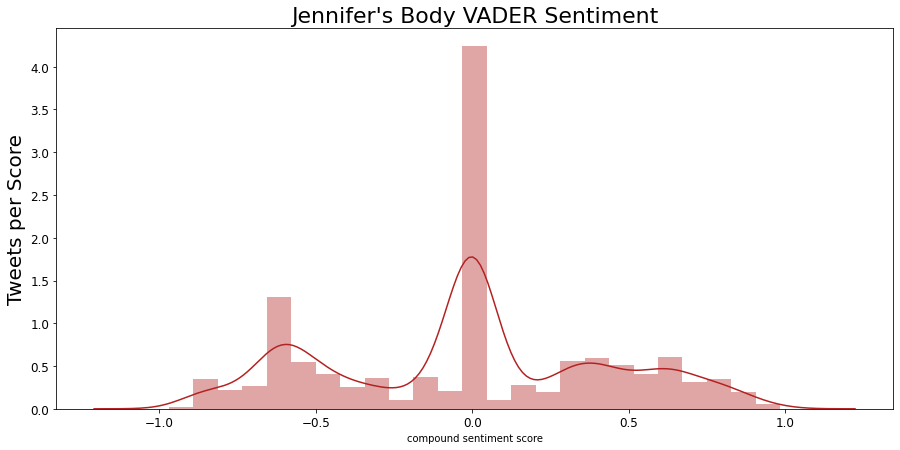

In [65]:
#distribution of vader score
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.distplot(BigShort['compound sentiment score'], color = 'firebrick')
plt.xlabel('Compound Sentiment Score', fontsize=18)
plt.ylabel('Tweets per Score', fontsize=18)
plt.title("The Big Short VADER Sentiment", fontsize=22)
plt.tick_params(labelsize='large')

plt.savefig('images/VADERbigshort.jpg')

# Cloudy with a Chance of Meatballs

In [66]:
#df_9 is a CSV of tweets (created in another notebook) about the movie Cloudy With a Chance of Meatballs
CloudyWithAChanceOfMeatballs = pd.read_csv('df_9.csv')

In [67]:
#drop unnecessary columns
CloudyWithAChanceOfMeatballs.drop(columns=['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'timezone',
       'place', 'cashtags', 'user_id', 'user_id_str', 'name',
       'day', 'hour', 'urls', 'photos', 'video', 'thumbnail', 'quote_url', 'retweet_date',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 
       'reply_to', 'translate', 'trans_src', 'trans_dest'], axis=1, inplace = True)

In [68]:
CloudyWithAChanceOfMeatballs['date'] = pd.to_datetime(CloudyWithAChanceOfMeatballs['date'])

In [69]:
CloudyWithAChanceOfMeatballs['vader_score'] = CloudyWithAChanceOfMeatballs['tweet'].apply(lambda x: vader.polarity_scores(x))
CloudyWithAChanceOfMeatballs['vader_score']

0       {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...
1       {'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compou...
2       {'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'comp...
3       {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...
4       {'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'comp...
                              ...                        
5871    {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...
5872    {'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp...
5873    {'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'comp...
5874    {'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'comp...
5875    {'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp...
Name: vader_score, Length: 5876, dtype: object

In [70]:
CloudyWithAChanceOfMeatballs['positive sentiment score'] = CloudyWithAChanceOfMeatballs['tweet'].apply(lambda x: vader.polarity_scores(x)['pos'])
CloudyWithAChanceOfMeatballs['negative sentiment score'] = CloudyWithAChanceOfMeatballs['tweet'].apply(lambda x: vader.polarity_scores(x)['neg'])
CloudyWithAChanceOfMeatballs['neutral sentiment score'] = CloudyWithAChanceOfMeatballs['tweet'].apply(lambda x: vader.polarity_scores(x)['neu'])
CloudyWithAChanceOfMeatballs['compound sentiment score'] = CloudyWithAChanceOfMeatballs['tweet'].apply(lambda x: vader.polarity_scores(x)['compound'])
CloudyWithAChanceOfMeatballs.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2010-09-10 19:44:23,I am watching Cloudy with a Chance of Meatball...,en,['cloudywithachanceofmeatballs'],rstwarren,https://twitter.com/rstwarren/status/24147588381,False,0,0,0,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",0.167,0.0,0.833,0.2500
1,2010-09-10 19:20:09,At an outdoor showing of Cloudy with a Chance ...,en,[],serotoninjunkie,https://twitter.com/serotoninjunkie/status/241...,False,0,0,0,"{'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compou...",0.350,0.0,0.650,0.6580
2,2010-09-10 18:50:22,"What the what? I'm behind on this, but Cloudy ...",en,['welcomemoviesurprise'],maxwhattimeisit,https://twitter.com/maxwhattimeisit/status/241...,False,0,0,0,"{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'comp...",0.208,0.0,0.792,0.7227
3,2010-09-10 18:13:37,Watching cloudy with a chance of meatballs and...,en,[],484484,https://twitter.com/484484/status/24141633598,False,0,0,0,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.259,0.0,0.741,0.3612
4,2010-09-10 18:05:12,"Family Movie Night in 3 1/2hours ""Cloudy With ...",en,[],_chris_mayfield,https://twitter.com/_chris_mayfield/status/241...,False,0,0,0,"{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'comp...",0.154,0.0,0.846,0.2500


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


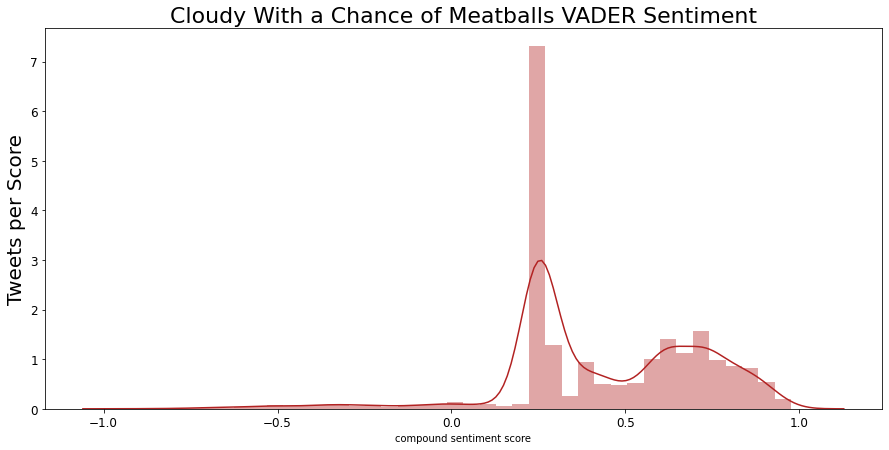

In [71]:
#distribution of vader score
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.distplot(CloudyWithAChanceOfMeatballs['compound sentiment score'], color = 'firebrick')
plt.xlabel('Compound Sentiment Score', fontsize=18)
plt.ylabel('Tweets per Score', fontsize=18)
plt.title("Cloudy With a Chance of Meatballs VADER Sentiment", fontsize=22)
plt.tick_params(labelsize='large')

plt.savefig('images/VADERcloudymeatballs.jpg')

People seemed to like it

# Wall-E

In [72]:
#df_10 is a CSV of tweets (created in another notebook) about the movie Wall-E
WallE = pd.read_csv('df_10.csv')

In [73]:
#drop unnecessary columns
WallE.drop(columns=['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'timezone',
       'place', 'cashtags', 'user_id', 'user_id_str', 'name',
       'day', 'hour', 'urls', 'photos', 'video', 'thumbnail', 'quote_url', 'retweet_date',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 
       'reply_to', 'translate', 'trans_src', 'trans_dest'], axis=1, inplace = True)

In [74]:
WallE['date'] = pd.to_datetime(WallE['date'])

In [75]:
WallE['vader_score'] = WallE['tweet'].apply(lambda x: vader.polarity_scores(x))
WallE['vader_score']

0       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2       {'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...
3       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                              ...                        
5363    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5364    {'neg': 0.147, 'neu': 0.467, 'pos': 0.387, 'co...
5365    {'neg': 0.068, 'neu': 0.611, 'pos': 0.322, 'co...
5366    {'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'comp...
5367    {'neg': 0.0, 'neu': 0.432, 'pos': 0.568, 'comp...
Name: vader_score, Length: 5368, dtype: object

In [78]:
WallE['positive sentiment score'] = WallE['tweet'].apply(lambda x: vader.polarity_scores(x)['pos'])
WallE['negative sentiment score'] = WallE['tweet'].apply(lambda x: vader.polarity_scores(x)['neg'])
WallE['neutral sentiment score'] = WallE['tweet'].apply(lambda x: vader.polarity_scores(x)['neu'])
WallE['compound sentiment score'] = WallE['tweet'].apply(lambda x: vader.polarity_scores(x)['compound'])
WallE.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2009-06-25 19:37:09,Breaking News: Wall-E's battier has run out. H...,en,[],gawjr,https://twitter.com/gawjr/status/2335057043,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
1,2009-06-25 19:27:14,"I think my mind is too complex for WALL-E, @wu...",en,[],itsbrookekelly,https://twitter.com/itsbrookekelly/status/2334...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
2,2009-06-25 19:22:26,Bout to watch Wall-e the best movie ever!!!!,en,[],IdntKnowat2put,https://twitter.com/IdntKnowat2put/status/2334...,False,0,0,0,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...",0.434,0.0,0.566,0.7482
3,2009-06-25 19:20:48,Finally home full of micky d's n watchn wall-e,en,[],EliThunder85,https://twitter.com/EliThunder85/status/233474...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
4,2009-06-25 19:07:13,@erinichristine word to wall-e!,en,[],_paulstewart,https://twitter.com/_paulstewart/status/233449...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


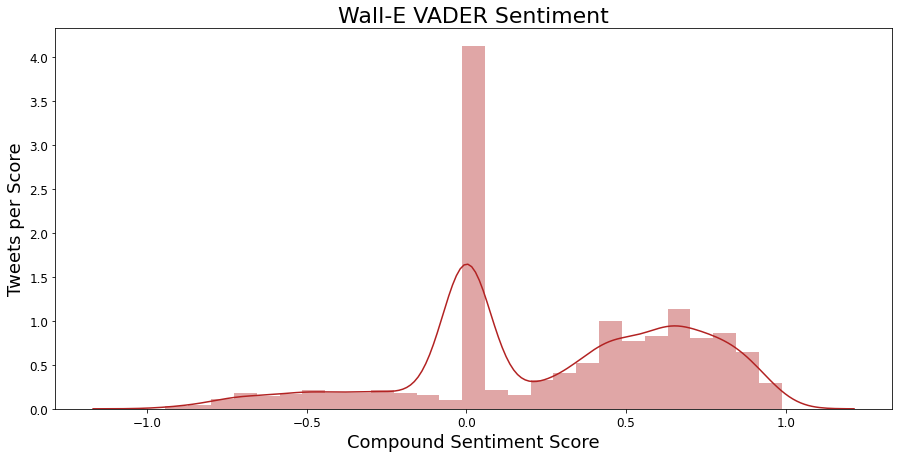

In [119]:
#distribution of vader score
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.distplot(WallE['compound sentiment score'], color = 'firebrick')
plt.xlabel('Compound Sentiment Score', fontsize=18)
plt.ylabel('Tweets per Score', fontsize=18)
plt.title('Wall-E VADER Sentiment', fontsize=22)
plt.tick_params(labelsize='large')

plt.savefig('images/VADERwalle.jpg')

Wall-E did well

# Slumdog Millionaire

In [107]:
#df_11 is a CSV of tweets (created in another notebook) about the movie Slumdog Millionaire
SlumdogMillionaire = pd.read_csv('df_11.csv')

In [108]:
#drop unnecessary columns
SlumdogMillionaire.drop(columns=['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'timezone',
       'place', 'cashtags', 'user_id', 'user_id_str', 'name',
       'day', 'hour', 'urls', 'photos', 'video', 'thumbnail', 'quote_url', 'retweet_date',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 
       'reply_to', 'translate', 'trans_src', 'trans_dest'], axis=1, inplace = True)

In [109]:
SlumdogMillionaire['date'] = pd.to_datetime(SlumdogMillionaire['date'])

In [110]:
SlumdogMillionaire['vader_score'] = SlumdogMillionaire['tweet'].apply(lambda x: vader.polarity_scores(x))
SlumdogMillionaire['vader_score']

0       {'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'comp...
1       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2       {'neg': 0.0, 'neu': 0.59, 'pos': 0.41, 'compou...
3       {'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp...
4       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                              ...                        
5281    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5282    {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...
5283    {'neg': 0.084, 'neu': 0.8, 'pos': 0.116, 'comp...
5284    {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...
5285    {'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'comp...
Name: vader_score, Length: 5286, dtype: object

In [111]:
SlumdogMillionaire['positive sentiment score'] = SlumdogMillionaire['tweet'].apply(lambda x: vader.polarity_scores(x)['pos'])
SlumdogMillionaire['negative sentiment score'] = SlumdogMillionaire['tweet'].apply(lambda x: vader.polarity_scores(x)['neg'])
SlumdogMillionaire['neutral sentiment score'] = SlumdogMillionaire['tweet'].apply(lambda x: vader.polarity_scores(x)['neu'])
SlumdogMillionaire['compound sentiment score'] = SlumdogMillionaire['tweet'].apply(lambda x: vader.polarity_scores(x)['compound'])
SlumdogMillionaire.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2009-11-10 18:29:55,@krael52 because shravani and keethi want to p...,en,[],GregoryRael,https://twitter.com/GregoryRael/status/5603007478,False,0,0,0,"{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'comp...",0.166,0.0,0.834,0.4574
1,2009-11-10 17:56:36,Outside with sam jefferson and my big sis... c...,en,[],Desha_c16,https://twitter.com/Desha_c16/status/5602137272,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
2,2009-11-10 17:29:05,@1heavenlyflower: OMG! my favorite movie.........,en,[],TrinaChavez,https://twitter.com/TrinaChavez/status/5601420853,False,0,0,0,"{'neg': 0.0, 'neu': 0.59, 'pos': 0.41, 'compou...",0.410,0.0,0.590,0.6331
3,2009-11-10 17:20:07,"Crapola News!, Slumdog Millionaire grabs 5 nod...",en,[],DailyNewsBuzz,https://twitter.com/DailyNewsBuzz/status/56011...,False,0,0,0,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp...",0.215,0.0,0.785,0.5093
4,2009-11-10 17:13:39,Standing in line with @lparaggio to get her vi...,en,[],isaiahheaden,https://twitter.com/isaiahheaden/status/560102...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


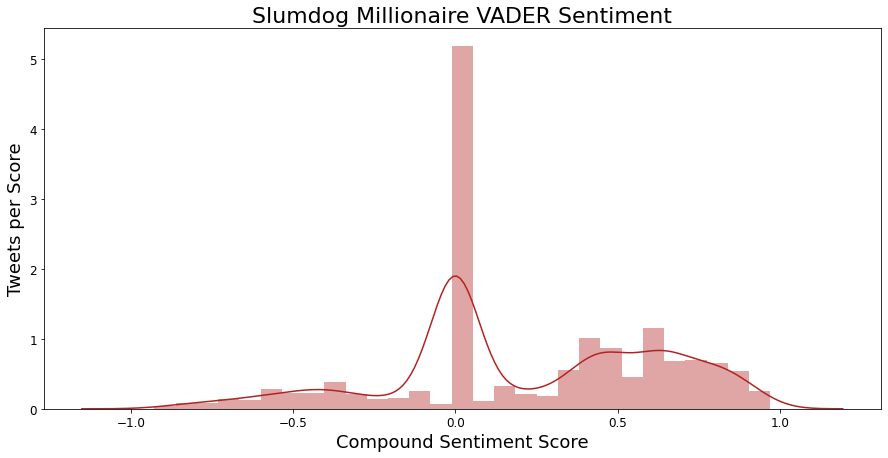

In [112]:
#distribution of vader score
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.distplot(SlumdogMillionaire['compound sentiment score'], color = 'firebrick')
plt.xlabel('Compound Sentiment Score', fontsize=18)
plt.ylabel('Tweets per Score', fontsize=18)
plt.title('Slumdog Millionaire VADER Sentiment', fontsize=22)
plt.tick_params(labelsize='large')

plt.savefig('images/VADERslumdogmoney.jpg')

# Bird Box

In [113]:
#df_12 is a CSV of tweets (created in another notebook) about the movie Bird Box
BirdBox = pd.read_csv('df_12.csv')

In [114]:
#drop unnecessary columns
BirdBox.drop(columns=['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'timezone',
       'place', 'cashtags', 'user_id', 'user_id_str', 'name',
       'day', 'hour', 'urls', 'photos', 'video', 'thumbnail', 'quote_url', 'retweet_date',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 
       'reply_to', 'translate', 'trans_src', 'trans_dest'], axis=1, inplace = True)

In [115]:
BirdBox['date'] = pd.to_datetime(BirdBox['date'])

In [116]:
BirdBox['vader_score'] = BirdBox['tweet'].apply(lambda x: vader.polarity_scores(x))
BirdBox['vader_score']

0       {'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'comp...
1       {'neg': 0.242, 'neu': 0.522, 'pos': 0.236, 'co...
2       {'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'comp...
3       {'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp...
4       {'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp...
                              ...                        
5247    {'neg': 0.151, 'neu': 0.756, 'pos': 0.093, 'co...
5248    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5249    {'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'comp...
5250    {'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'comp...
5251    {'neg': 0.185, 'neu': 0.815, 'pos': 0.0, 'comp...
Name: vader_score, Length: 5252, dtype: object

In [117]:
BirdBox['positive sentiment score'] = BirdBox['tweet'].apply(lambda x: vader.polarity_scores(x)['pos'])
BirdBox['negative sentiment score'] = BirdBox['tweet'].apply(lambda x: vader.polarity_scores(x)['neg'])
BirdBox['neutral sentiment score'] = BirdBox['tweet'].apply(lambda x: vader.polarity_scores(x)['neu'])
BirdBox['compound sentiment score'] = BirdBox['tweet'].apply(lambda x: vader.polarity_scores(x)['compound'])
BirdBox.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2019-12-12 18:55:11,Lil Natty &amp; Thunda ft. Travis World &amp; ...,en,"['caribbeansessions', 'pressplay']",CaribSessions,https://twitter.com/CaribSessions/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'comp...",0.062,0.000,0.938,0.2023
1,2019-12-12 18:48:41,I also stopped and ended up buying the Angry B...,en,[],nerdboner,https://twitter.com/nerdboner/status/120527329...,False,1,0,0,"{'neg': 0.242, 'neu': 0.522, 'pos': 0.236, 'co...",0.236,0.242,0.522,-0.0587
2,2019-12-12 18:37:12,I know I'm doing really well but part of me ju...,en,[],Antalya_Bird,https://twitter.com/Antalya_Bird/status/120527...,False,1,0,0,"{'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'comp...",0.078,0.000,0.922,0.1770
3,2019-12-12 18:35:24,K News - Olympia underground record label Fair...,en,[],K_recs,https://twitter.com/K_recs/status/120526995400...,False,1,0,1,"{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp...",0.082,0.000,0.918,0.3802
4,2019-12-12 18:34:14,@RuthsBestBoy I'd like to commission an all-ye...,en,[],DanaGavin1895,https://twitter.com/DanaGavin1895/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp...",0.233,0.000,0.767,0.9313


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


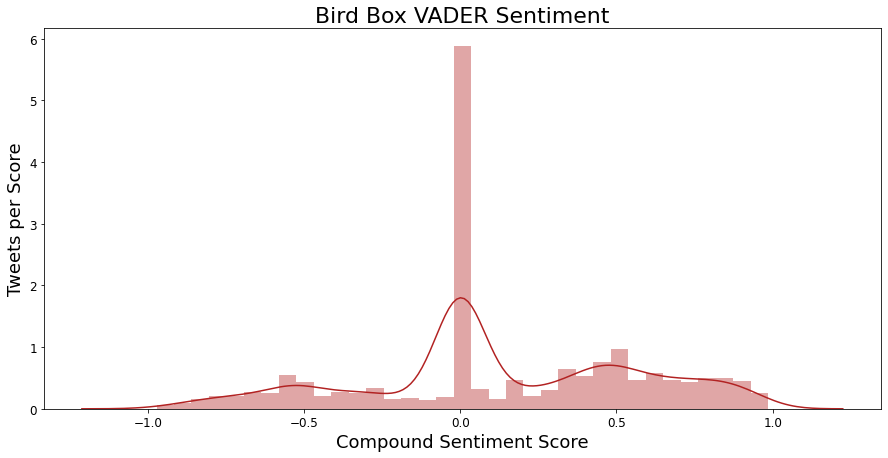

In [118]:
#distribution of vader score
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.distplot(BirdBox['compound sentiment score'], color = 'firebrick')
plt.xlabel('Compound Sentiment Score', fontsize=18)
plt.ylabel('Tweets per Score', fontsize=18)
plt.title('Bird Box VADER Sentiment', fontsize=22)
plt.tick_params(labelsize='large')

plt.savefig('images/VADERbirdbox.jpg')

# Silver Linings Playbook

In [80]:
#df_13 is a CSV of tweets (created in another notebook) about the movie Silver Linings Playbook
SilverLiningsPlaybook = pd.read_csv('df_13.csv')

In [81]:
#drop unnecessary columns
SilverLiningsPlaybook.drop(columns=['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'timezone',
       'place', 'cashtags', 'user_id', 'user_id_str', 'name',
       'day', 'hour', 'urls', 'photos', 'video', 'thumbnail', 'quote_url', 'retweet_date',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 
       'reply_to', 'translate', 'trans_src', 'trans_dest'], axis=1, inplace = True)

In [82]:
SilverLiningsPlaybook['date'] = pd.to_datetime(SilverLiningsPlaybook['date'])

In [83]:
SilverLiningsPlaybook['vader_score'] = SilverLiningsPlaybook['tweet'].apply(lambda x: vader.polarity_scores(x))
SilverLiningsPlaybook['vader_score']

0       {'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp...
1       {'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'comp...
2       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3       {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp...
4       {'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'comp...
                              ...                        
5273    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5274    {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...
5275    {'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'comp...
5276    {'neg': 0.06, 'neu': 0.74, 'pos': 0.2, 'compou...
5277    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: vader_score, Length: 5278, dtype: object

In [84]:
SilverLiningsPlaybook['positive sentiment score'] = SilverLiningsPlaybook['tweet'].apply(lambda x: vader.polarity_scores(x)['pos'])
SilverLiningsPlaybook['negative sentiment score'] = SilverLiningsPlaybook['tweet'].apply(lambda x: vader.polarity_scores(x)['neg'])
SilverLiningsPlaybook['neutral sentiment score'] = SilverLiningsPlaybook['tweet'].apply(lambda x: vader.polarity_scores(x)['neu'])
SilverLiningsPlaybook['compound sentiment score'] = SilverLiningsPlaybook['tweet'].apply(lambda x: vader.polarity_scores(x)['compound'])
SilverLiningsPlaybook.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2013-11-14 18:47:39,I got silver linings playbook so basically im ...,en,[],sassy_pizza,https://twitter.com/sassy_pizza/status/4011343...,False,0,0,0,"{'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp...",0.272,0.000,0.728,0.6249
1,2013-11-14 18:37:55,And if I were to write a book right now my ope...,en,[],liammiller87,https://twitter.com/liammiller87/status/401131...,False,0,1,0,"{'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'comp...",0.000,0.149,0.851,-0.6759
2,2013-11-14 18:34:28,Finally watching #silverliningsplaybook,en,['silverliningsplaybook'],CuteStalkerChic,https://twitter.com/CuteStalkerChic/status/401...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
3,2013-11-14 18:21:20,Silver linings playbook: Four good things abou...,en,[],PNCAU,https://twitter.com/PNCAU/status/4011277414512...,False,0,0,0,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp...",0.195,0.000,0.805,0.4404
4,2013-11-14 18:07:35,Silver Linings Playbook gets a solid 8 out of 10.,en,[],derekgoulding,https://twitter.com/derekgoulding/status/40112...,False,0,0,0,"{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'comp...",0.151,0.000,0.849,0.1531


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


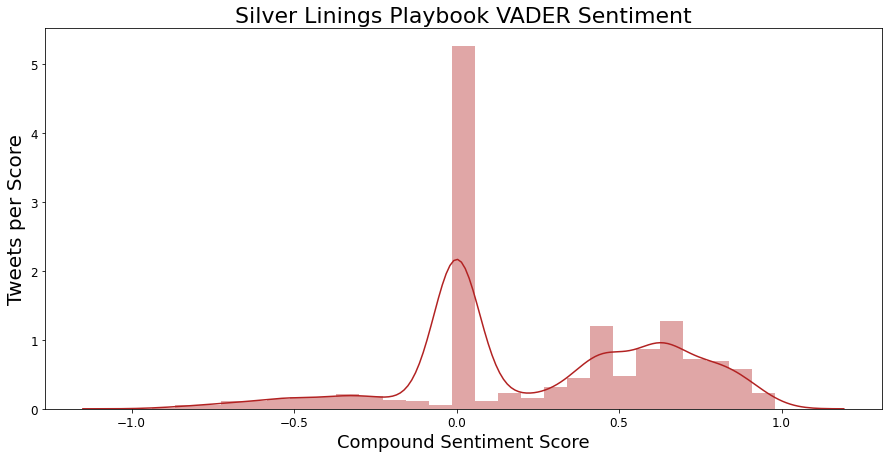

In [103]:
#distribution of vader score
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.distplot(SilverLiningsPlaybook['compound sentiment score'], color = 'firebrick')
plt.ylabel('Tweets per Score', fontsize=20)
plt.xlabel('Compound Sentiment Score', fontsize=18)
plt.title('Silver Linings Playbook VADER Sentiment', fontsize=22)
plt.tick_params(labelsize='large')

plt.savefig('images/VADERbirdbox.jpg')

Overall Positive

# Django Unchained

In [86]:
#df_14 is a CSV of tweets (created in another notebook) about the movie Django Unchained
DjangoUnchained = pd.read_csv('df_14.csv')

In [87]:
#drop unnecessary columns
DjangoUnchained.drop(columns=['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'timezone',
       'place', 'cashtags', 'user_id', 'user_id_str', 'name',
       'day', 'hour', 'urls', 'photos', 'video', 'thumbnail', 'quote_url', 'retweet_date',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 
       'reply_to', 'translate', 'trans_src', 'trans_dest'], axis=1, inplace = True)

In [88]:
DjangoUnchained['date'] = pd.to_datetime(DjangoUnchained['date'])

In [89]:
DjangoUnchained['vader_score'] = DjangoUnchained['tweet'].apply(lambda x: vader.polarity_scores(x))
DjangoUnchained['vader_score']

0       {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...
1       {'neg': 0.301, 'neu': 0.699, 'pos': 0.0, 'comp...
2       {'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...
3       {'neg': 0.177, 'neu': 0.823, 'pos': 0.0, 'comp...
4       {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...
                              ...                        
4901    {'neg': 0.0, 'neu': 0.486, 'pos': 0.514, 'comp...
4902    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4903    {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...
4904    {'neg': 0.159, 'neu': 0.841, 'pos': 0.0, 'comp...
4905    {'neg': 0.175, 'neu': 0.825, 'pos': 0.0, 'comp...
Name: vader_score, Length: 4906, dtype: object

In [90]:
DjangoUnchained['positive sentiment score'] = DjangoUnchained['tweet'].apply(lambda x: vader.polarity_scores(x)['pos'])
DjangoUnchained['negative sentiment score'] = DjangoUnchained['tweet'].apply(lambda x: vader.polarity_scores(x)['neg'])
DjangoUnchained['neutral sentiment score'] = DjangoUnchained['tweet'].apply(lambda x: vader.polarity_scores(x)['neu'])
DjangoUnchained['compound sentiment score'] = DjangoUnchained['tweet'].apply(lambda x: vader.polarity_scores(x)['compound'])
DjangoUnchained.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2013-12-23 18:44:22,Django Unchained is brilliant #topfilm,en,['topfilm'],Jacobbck_,https://twitter.com/Jacobbck_/status/415266664...,False,2,0,0,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.487,0.000,0.513,0.5859
1,2013-12-23 18:31:11,Every 10 seconds in Django Unchained you hear ...,en,[],Umaarrr_,https://twitter.com/Umaarrr_/status/4152633444...,False,0,0,0,"{'neg': 0.301, 'neu': 0.699, 'pos': 0.0, 'comp...",0.000,0.301,0.699,-0.6486
2,2013-12-23 18:26:03,Cause I will be a problem. I’m talking Django ...,en,[],DeShayFromVA,https://twitter.com/DeShayFromVA/status/415262...,False,0,0,0,"{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",0.000,0.231,0.769,-0.4019
3,2013-12-23 18:16:54,White house down... Man of steel... Monsters U...,en,[],Mystic_Sk,https://twitter.com/Mystic_Sk/status/415259749...,False,0,2,0,"{'neg': 0.177, 'neu': 0.823, 'pos': 0.0, 'comp...",0.000,0.177,0.823,-0.4767
4,2013-12-23 18:15:53,on a movie scale of 'm night shamalyans the vi...,en,[],dboyyfresh,https://twitter.com/dboyyfresh/status/41525949...,False,1,0,0,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",0.000,0.167,0.833,-0.6124


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


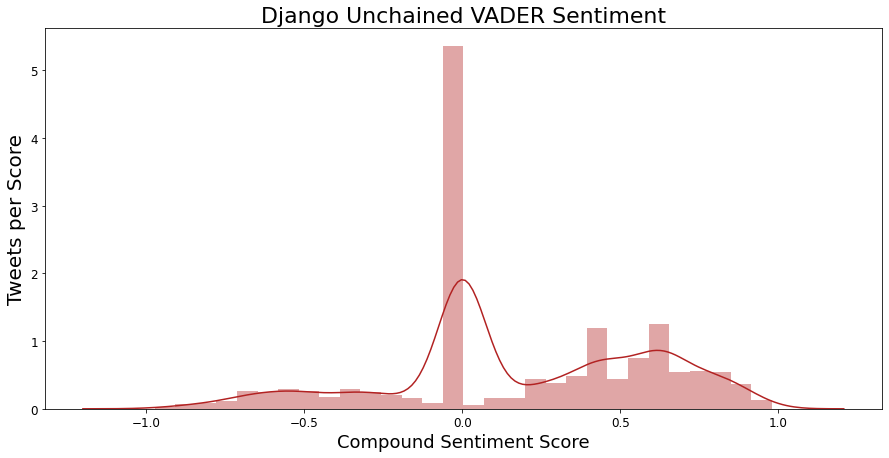

In [102]:
#distribution of vader score
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.distplot(DjangoUnchained['compound sentiment score'], color = 'firebrick')
plt.ylabel('Tweets per Score', fontsize=20)
plt.xlabel('Compound Sentiment Score', fontsize=18)
plt.title('Django Unchained VADER Sentiment', fontsize=22)
plt.tick_params(labelsize='large')

plt.savefig('images/VADERdjango.jpg')

Positive Sentiment

# Hocus Pocus

In [93]:
#df_15 is a CSV of tweets (created in another notebook) about the 1993 Halloween classic, Hocus Pocus
HocusPocus = pd.read_csv('df_15.csv')

In [94]:
#drop unnecessary columns
HocusPocus.drop(columns=['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'timezone',
       'place', 'cashtags', 'user_id', 'user_id_str', 'name',
       'day', 'hour', 'urls', 'photos', 'video', 'thumbnail', 'quote_url', 'retweet_date',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 
       'reply_to', 'translate', 'trans_src', 'trans_dest'], axis=1, inplace = True)

In [95]:
HocusPocus['date'] = pd.to_datetime(HocusPocus['date'])

In [96]:
HocusPocus['vader_score'] = HocusPocus['tweet'].apply(lambda x: vader.polarity_scores(x))
HocusPocus['vader_score']

0       {'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'comp...
1       {'neg': 0.045, 'neu': 0.907, 'pos': 0.047, 'co...
2       {'neg': 0.11, 'neu': 0.669, 'pos': 0.221, 'com...
3       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                              ...                        
5459    {'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'comp...
5460    {'neg': 0.136, 'neu': 0.661, 'pos': 0.202, 'co...
5461    {'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'comp...
5462    {'neg': 0.302, 'neu': 0.698, 'pos': 0.0, 'comp...
5463    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: vader_score, Length: 5464, dtype: object

In [97]:
HocusPocus['positive sentiment score'] = HocusPocus['tweet'].apply(lambda x: vader.polarity_scores(x)['pos'])
HocusPocus['negative sentiment score'] = HocusPocus['tweet'].apply(lambda x: vader.polarity_scores(x)['neg'])
HocusPocus['neutral sentiment score'] = HocusPocus['tweet'].apply(lambda x: vader.polarity_scores(x)['neu'])
HocusPocus['compound sentiment score'] = HocusPocus['tweet'].apply(lambda x: vader.polarity_scores(x)['compound'])
HocusPocus.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2020-09-29 19:59:52,hocus pocus and wine -- fall nights make me so...,en,[],tineee92,https://twitter.com/tineee92/status/1311093367...,False,1,0,0,"{'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'comp...",0.267,0.000,0.733,0.6948
1,2020-09-29 19:59:44,"@BetteMidler @WisDems Hey bette, shut up you h...",en,[],petersam99,https://twitter.com/petersam99/status/13110933...,False,0,0,0,"{'neg': 0.045, 'neu': 0.907, 'pos': 0.047, 'co...",0.047,0.045,0.907,0.0258
2,2020-09-29 19:59:33,@LisaVoxNihili @MrOrr24 Same girl. I’ve got my...,en,[],AshHarvell,https://twitter.com/AshHarvell/status/13110932...,False,1,0,0,"{'neg': 0.11, 'neu': 0.669, 'pos': 0.221, 'com...",0.221,0.110,0.669,0.7003
3,2020-09-29 19:58:52,IT INVOLVES ME JOINING THE HOCUS POCUS VERSE 👀,en,[],sunsettos,https://twitter.com/sunsettos/status/131109311...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
4,2020-09-29 19:58:48,am i the only one who’s never seen hocus pocus...,en,[],shanel_lilyy,https://twitter.com/shanel_lilyy/status/131109...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


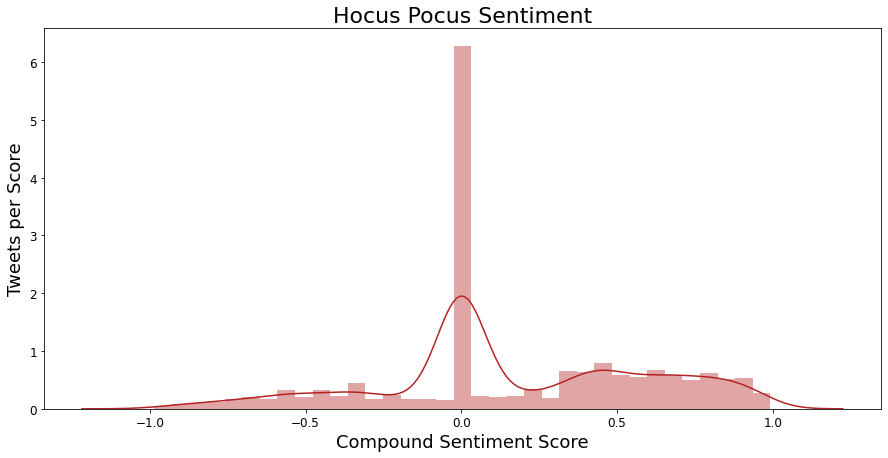

In [101]:
#distribution of vader score
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.distplot(HocusPocus['compound sentiment score'], color = 'firebrick')
plt.ylabel('Tweets per Score', fontsize=18)
plt.title('Hocus Pocus Sentiment', fontsize=22)
plt.xlabel('Compound Sentiment Score', fontsize=18)
plt.tick_params(labelsize='large')

plt.savefig('images/VADERhocuspocus.jpg')

Everyone loves Hocus Pocus even 2 decades later